## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 
## Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps. 
## Explore and analyze the data to discover key factors responsible for app engagement and success.

In [576]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\asus\Desktop\Almabetter\datasets\capstone projects")

In [577]:
df = pd.read_csv("Play Store Data.csv")

In [578]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [579]:
df[["date","year"]] = df["Last Updated"].str.split(",",expand=True)
df.drop("Last Updated", axis=1, inplace=True)

In [580]:
print("df shape is",df.shape)

df shape is (10841, 14)


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  date            10841 non-null  object 
 13  year            10840 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.2+ MB


# 1. Data Cleaning


In [582]:
# Data type of installs column is string and we have to convert this string data type into int and removing unwanted strings(+,)

# here rstrip function is used to remove the right most string('+') from the string

df["Installs"] = df["Installs"].map(lambda x: x.rstrip("+"))

# here split method is used to remove "," between the numbers and then join method is joining the splitted string.

df["Installs"] = df["Installs"].map(lambda x: ''.join(x.split(",")))


In [583]:
df["Size"] = df["Size"].map(lambda x: x.rstrip("M"))

df["Size"] = df["Size"].map(lambda x: str(round((float(x.rstrip("k"))/1024),2)) if x[-1] == "k" else x)


In [584]:
df[df["Price"] != "0"].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,$4.99,Everyone,Business,1.5.2,4.0 and up,March 25,2018
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,$4.99,Everyone,Business,3.4.6,3.0 and up,April 11,2017
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,$4.99,Everyone,Business,1.5.2,4.0 and up,March 25,2018
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,$4.99,Everyone,Business,3.4.6,3.0 and up,April 11,2017
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,$3.99,Everyone,Communication,7.5.3.20547,4.1 and up,July 5,2018


In [585]:
df["Price"] = df["Price"].map(lambda x: x.lstrip("$") if x.startswith("$") else x)
df[df["Price"] != "0"].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,1.5.2,4.0 and up,March 25,2018
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,3.4.6,3.0 and up,April 11,2017
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,1.5.2,4.0 and up,March 25,2018
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,3.4.6,3.0 and up,April 11,2017
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,7.5.3.20547,4.1 and up,July 5,2018


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  date            10841 non-null  object 
 13  year            10840 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.2+ MB


### Handling null Values

In [587]:
df["Rating"].fillna(df["Rating"].mean(), inplace = True)

In [588]:
df.dropna(axis=0,inplace=True)

In [589]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
date              0
year              0
dtype: int64

In [590]:
df.shape

(10829, 14)

## Changing the Data Types of columns


In [591]:
df["Reviews"] = df["Reviews"].apply(lambda x: x).astype(int)
df["Size"] = df["Size"].apply(lambda x: float(x) if x != "Varies with device" else str(x))
df["Installs"] = df["Installs"].apply(lambda x: x).astype(int)
df["Price"] = df["Price"].apply(lambda x: x).astype(float)
df["year"] = df["year"].apply(lambda x: x).astype(int)



In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  int32  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Current Ver     10829 non-null  object 
 11  Android Ver     10829 non-null  object 
 12  date            10829 non-null  object 
 13  year            10829 non-null  int32  
dtypes: float64(2), int32(3), object(9)
memory usage: 1.1+ MB


In [593]:
# Converting number of installs into percentage.

count_of_values = df["Installs"].value_counts()
total_count = count_of_values.sum()
percent_of_each_values = round(count_of_values/total_count,2)*100
print(percent_of_each_values)

1000000       15.0
10000000      12.0
100000        11.0
10000         10.0
1000           8.0
5000000        7.0
100            7.0
500000         5.0
50000          4.0
5000           4.0
100000000      4.0
10             4.0
500            3.0
50000000       3.0
50             2.0
5              1.0
500000000      1.0
1              1.0
1000000000     1.0
0              0.0
Name: Installs, dtype: float64


# DATA VISULAISATION

#### 1. Plotting a count plot for Category  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

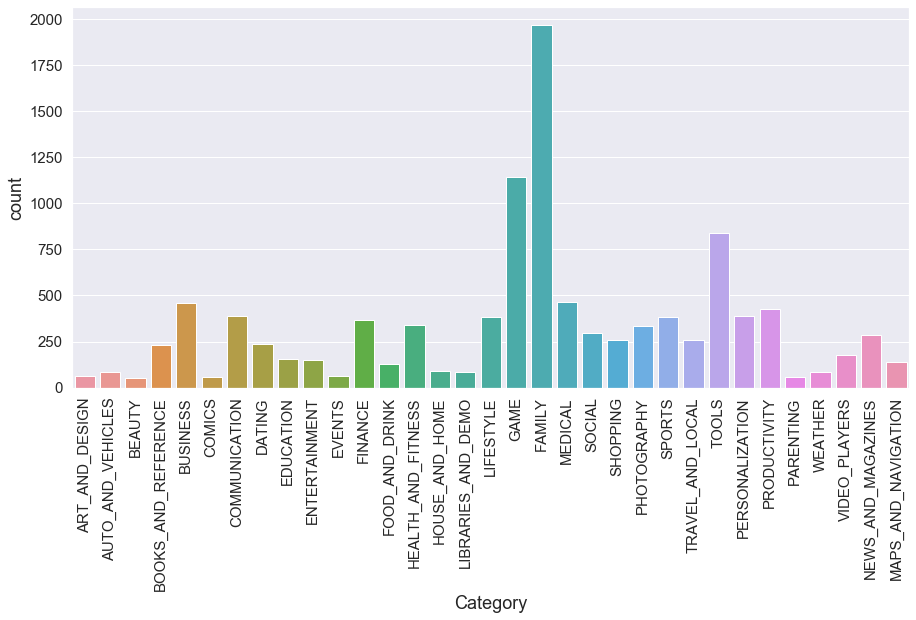

In [594]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(df["Category"])
plt.xticks(rotation=90)

From the count plot one can see that the top most category in this dataset is Family of count 1968, followed by Game-1144, Tools-841, Medical-463, Budiness-460

In [595]:
top_cat=df.groupby("Category").size().reset_index(name='Count').nlargest(5,'Count')
top_cat

,Category,Count
11,FAMILY,1968
14,GAME,1144
29,TOOLS,841
20,MEDICAL,463
4,BUSINESS,460


#### 2. Plotting a graph of showing total number of installation for each category 

In [596]:
# Grouping Category column with the installs column

no_of_installs = df.groupby("Category")["Installs"].sum().reset_index()
no_of_installs.head()

,Category,Installs
0,ART_AND_DESIGN,1.243331e+08
1,AUTO_AND_VEHICLES,5.313021e+07
2,BEAUTY,2.719705e+07
3,BOOKS_AND_REFERENCE,1.921469e+09
4,BUSINESS,1.001915e+09


Text(0.5, 1.0, 'Total number of installation for every category')

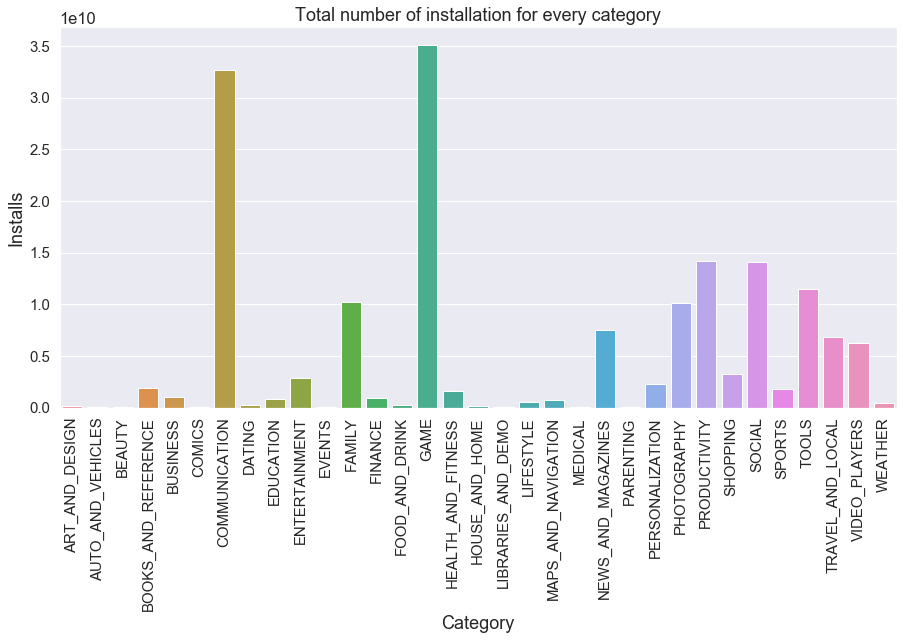

In [597]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(data=no_of_installs,x="Category",y="Installs")
plt.xticks(rotation=90)
plt.title("Total number of installation for every category")

Communication is the category in which highest number of installation happend, followed by Game, Productivity, Social and Tools

#### 3. Plotting a graph of showing total number of installation for each Content Ratings 

In [598]:
content_rat = df.groupby("Content Rating")["Installs"].sum().reset_index()
content_rat

,Content Rating,Installs
0,Adults only 18+,2.000000e+06
1,Everyone,1.141551e+11
2,Everyone 10+,1.323388e+10
3,Mature 17+,5.524491e+09
4,Teen,3.471635e+10
5,Unrated,5.050000e+04


In [599]:
app_conntent = df.groupby("Content Rating")["Installs"].size().reset_index(name = "number of apps")
app_conntent 

,Content Rating,number of apps
0,Adults only 18+,3
1,Everyone,8704
2,Everyone 10+,413
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


Text(0.5, 1.0, 'Total number of installation for every Content ratings')

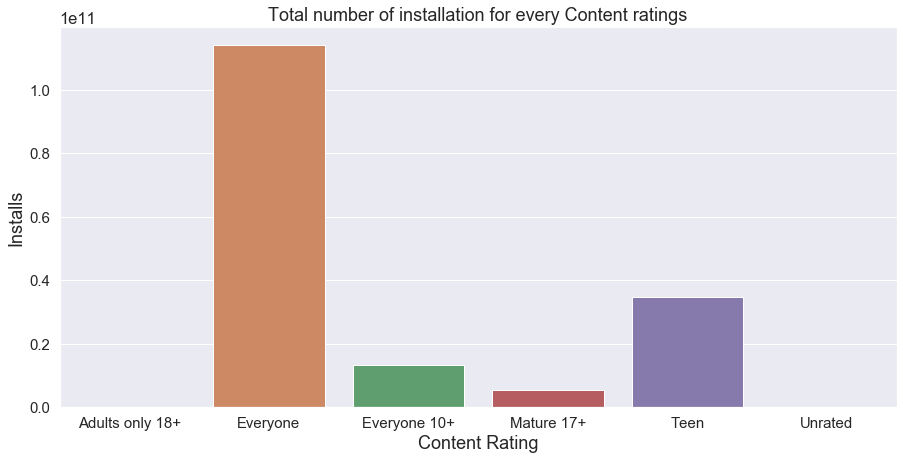

In [600]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(data=content_rat,x="Content Rating",y="Installs")
plt.title("Total number of installation for every Content ratings")

Text(0.5, 1.0, 'Total number of apps for every Content ratings')

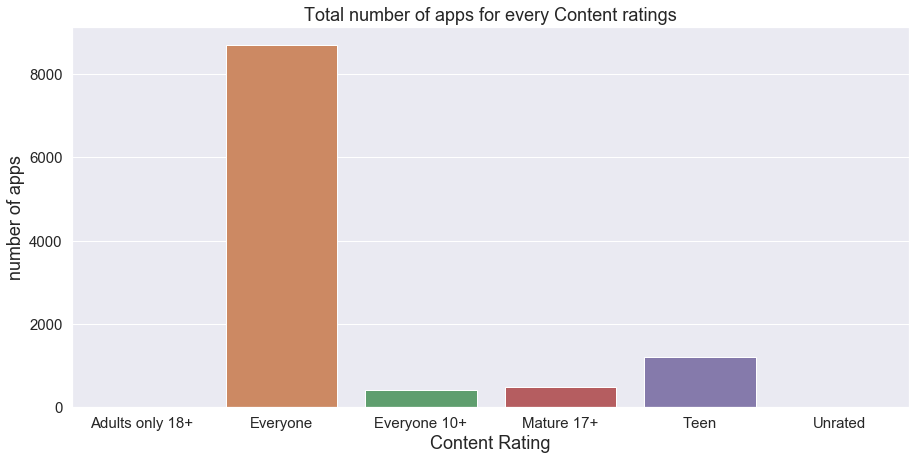

In [601]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.barplot(data=app_conntent,x="Content Rating",y="number of apps")
plt.title("Total number of apps for every Content ratings")

In [602]:
Type_of_app = df.groupby("Type")["Installs"].sum().reset_index()
Type_of_app

,Type,Installs
0,Free,1.675590e+11
1,Paid,7.290507e+07


([<matplotlib.patches.Wedge at 0x224ed578a08>,
 [Text(-1.0999989731399265, 0.0015030273143005076, 'Free'),
  Text(1.0999989730298458, -0.0015031078752957376, 'Paid')])

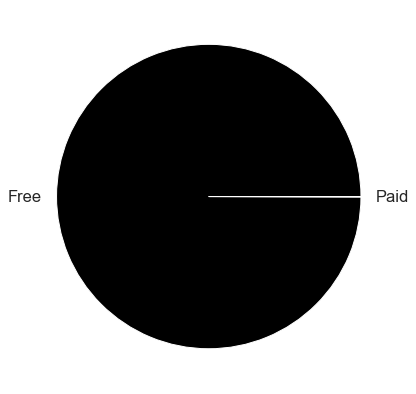

In [603]:
plt.figure(figsize =(15, 7))
mycolors = ["black"]
plt.pie(Type_of_app["Installs"], labels = Type_of_app["Type"], colors = mycolors)

From this pie chart anyone can see that peoples prefers the app which is free

Text(0.5, 0, 'Total installation of each app')

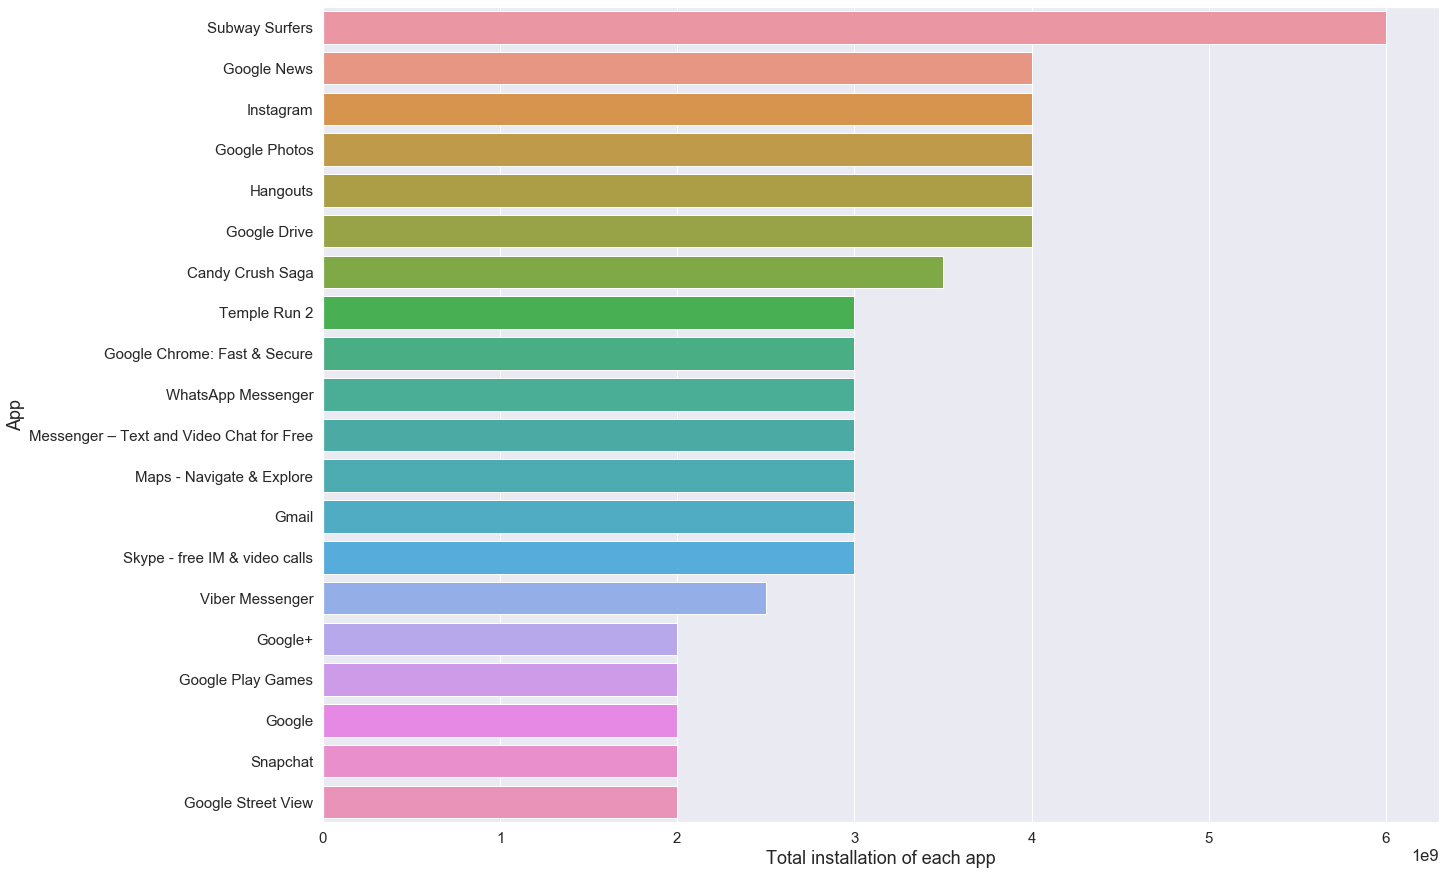

In [604]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
app_install= df.groupby("App")["Installs"].sum().sort_values(ascending= False).head(20)
sns.barplot(app_install.values,app_install.index)
plt.xlabel("Total installation of each app")


Text(0.5, 0, 'Total installation of each app')

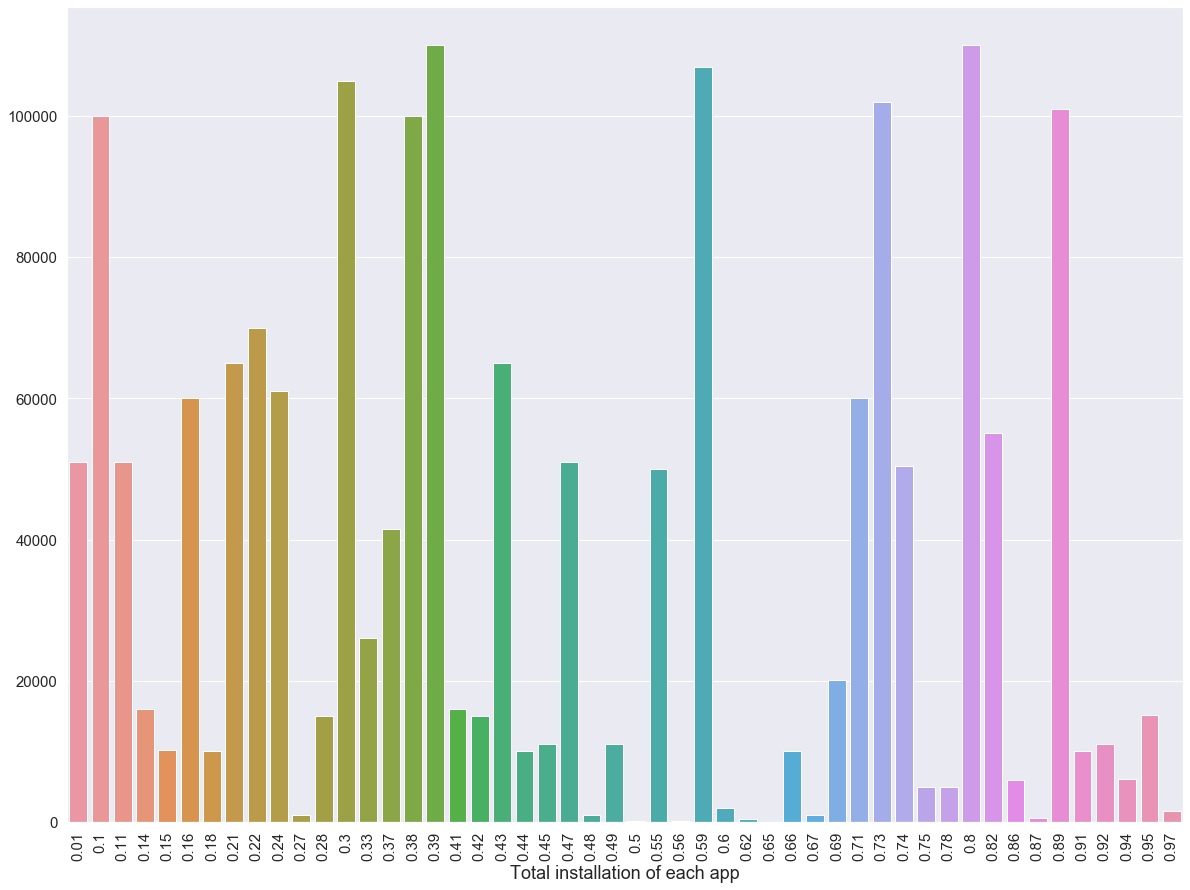

In [605]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
size_install= df.groupby("Size")["Installs"].sum().sort_values().head(50)

sns.barplot(size_install.index, size_install.values)

plt.xlabel("Total installation of each app")


Text(0.5, 0, 'Total installation of each app')

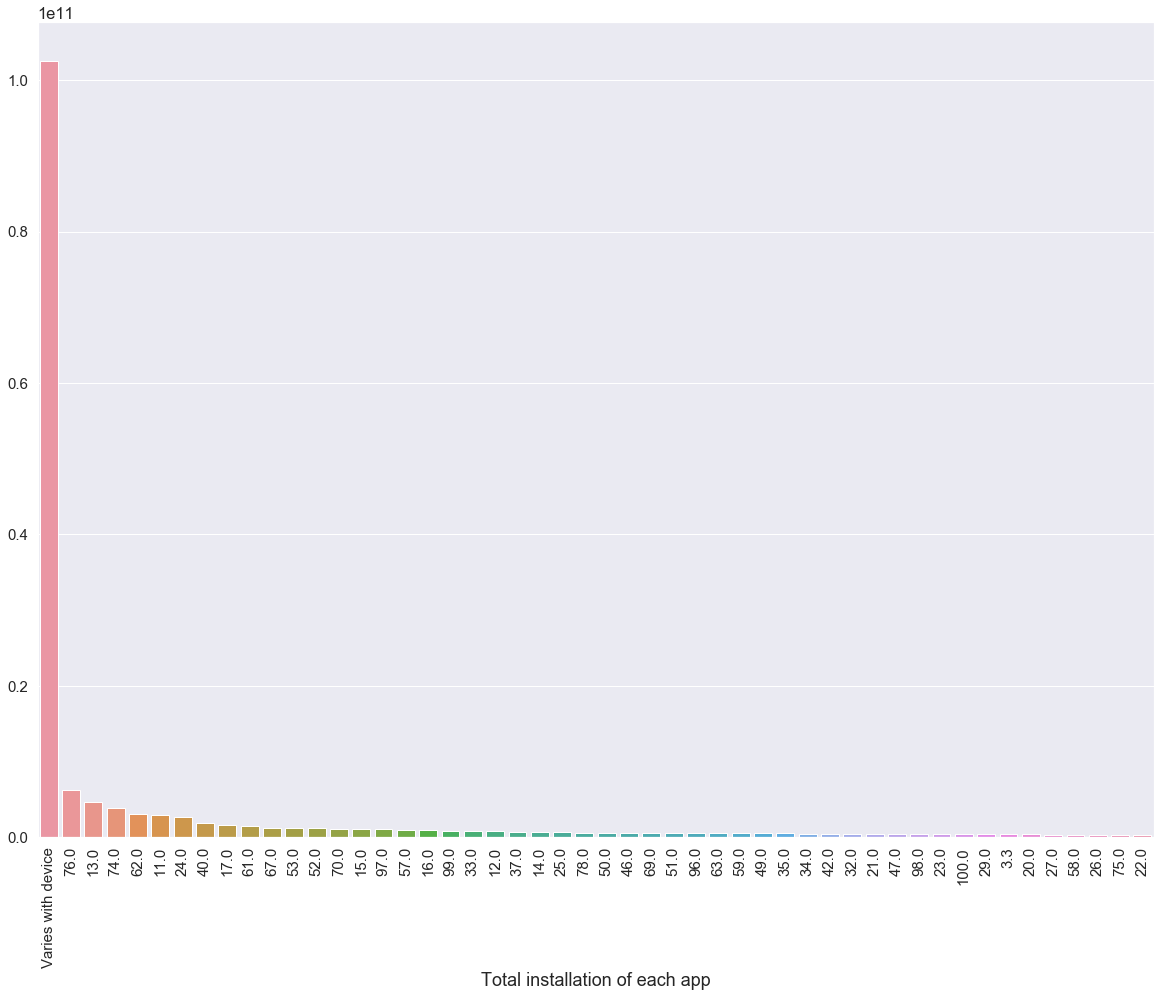

In [606]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
size_install= df.groupby("Size")["Installs"].sum().sort_values(ascending = False).head(50)

sns.barplot(size_install.index, size_install.values)

plt.xlabel("Total installation of each app")

From the above two plots it is clear that if the app size is small then number of installation is more.

In [607]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


In [608]:
rating_install = df.groupby("Rating")["Installs"].sum().sort_values(ascending = False).reset_index()


Text(0.5, 0, 'Total installation of each app')

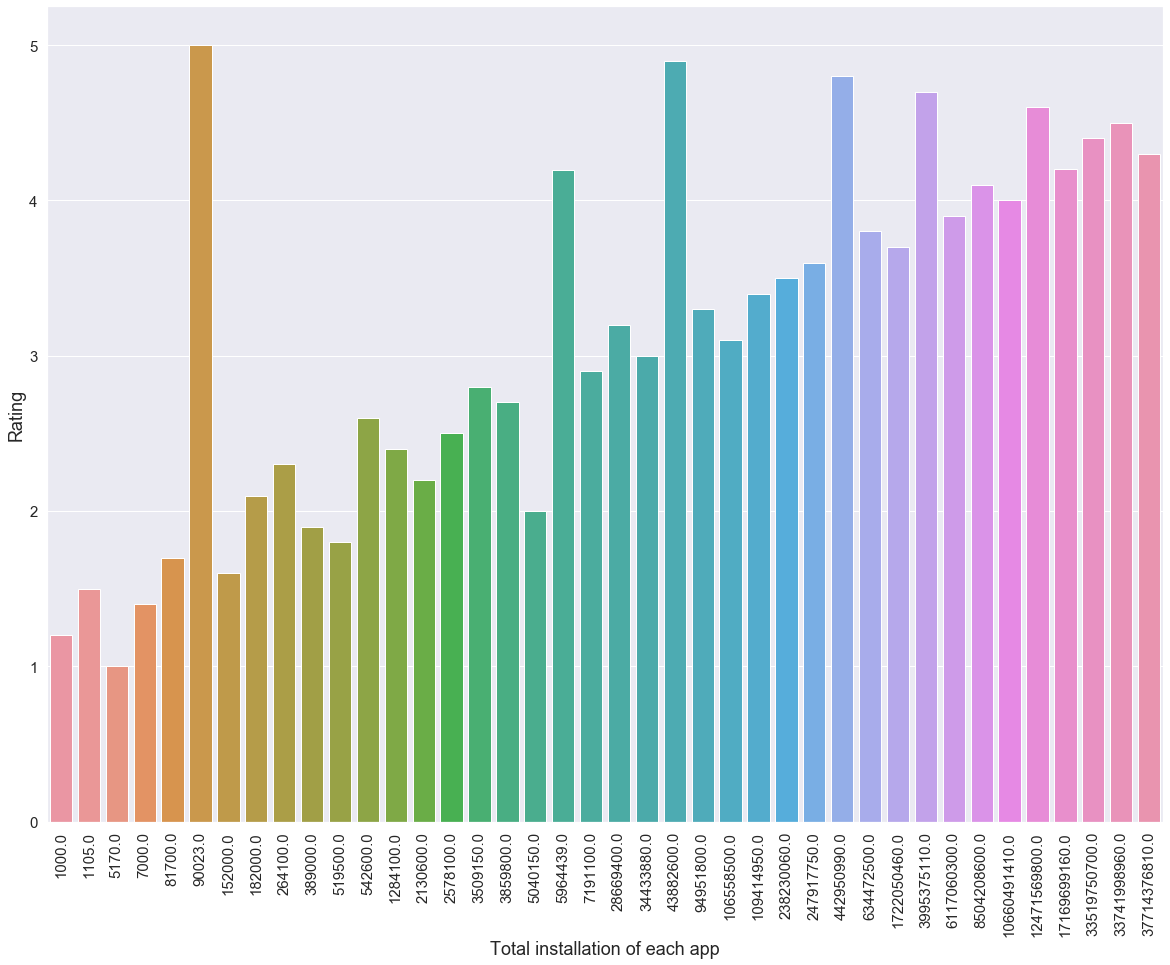

In [609]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
sns.barplot(data=rating_install, y = "Rating", x = "Installs")

plt.xlabel("Total installation of each app")


This plot is showing if the ratings are high then installions are also high.

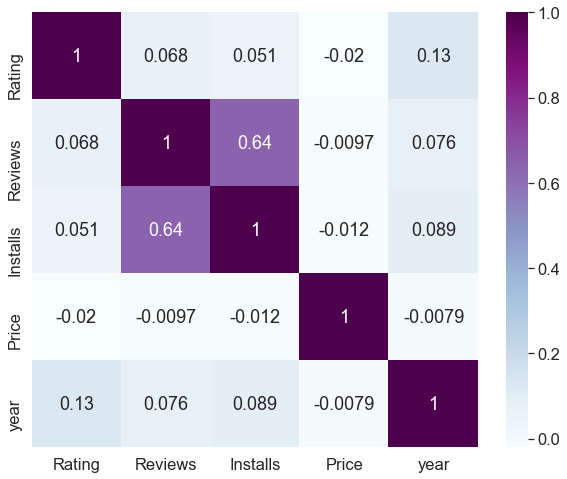

In [610]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")


In [612]:
df = df.drop(["Genres","Current Ver",  "Android Ver", "date", "year", "Price"], axis=1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,Everyone
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53,5000,Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,Everyone
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5,1000,Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,Mature 17+


###  The key factors responsible for app engagement and success are :-
#### 1. App	
#### 2.Category	
#### 3.Rating	
#### 4.Reviews	
#### 5.Size	
#### 6.Installs	
#### 7.Type	
#### 8.Content Rating